In [3]:
import numpy as np
import matplotlib.pyplot as plt
# import wfdb
from scipy.signal import find_peaks

def update_array(a, data_tmp):
    i = 0
    while i < len(a) - 2:
        if data_tmp[a[i]] < data_tmp[a[i + 1]] < data_tmp[a[i + 2]]:
            a = np.delete(a, i)
        elif data_tmp[a[i]] > data_tmp[a[i + 1]] > data_tmp[a[i + 2]]:
            a = np.delete(a, i + 2)
        else:
            i += 1
    return a

def delete_unique(a):
    mean = np.mean(a)
    std = np.std(a)
    # 设置阈值
    threshold = 1
    # 使用布尔索引删除特殊值
    filtered_a = a[np.abs(a - mean) <= threshold * std]
    return filtered_a

def get_mag_0(peaks2, data_tmp):
    return np.mean(data_tmp[peaks2[::2]])

def get_mag_1(peaks2, data_tmp):
    return np.mean(data_tmp[peaks2[1::2]])

data_test = np.load("./data/simu_10000_0.1_141_178_test.npy")
data_train = np.load("./data/simu_20000_0.1_90_140_train.npy")

In [7]:
data_tmp = data_test[888, :1000] 
data_tmp_raw = data_tmp 
max = np.max(data_tmp)
min = np.min(data_tmp)
data_tmp = data_tmp / max
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

[32 32 32 32 32 32 32 32 32 32]
32.0 68.0
5.40625


C:\Users\darcy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\darcy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\darcy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\darcy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


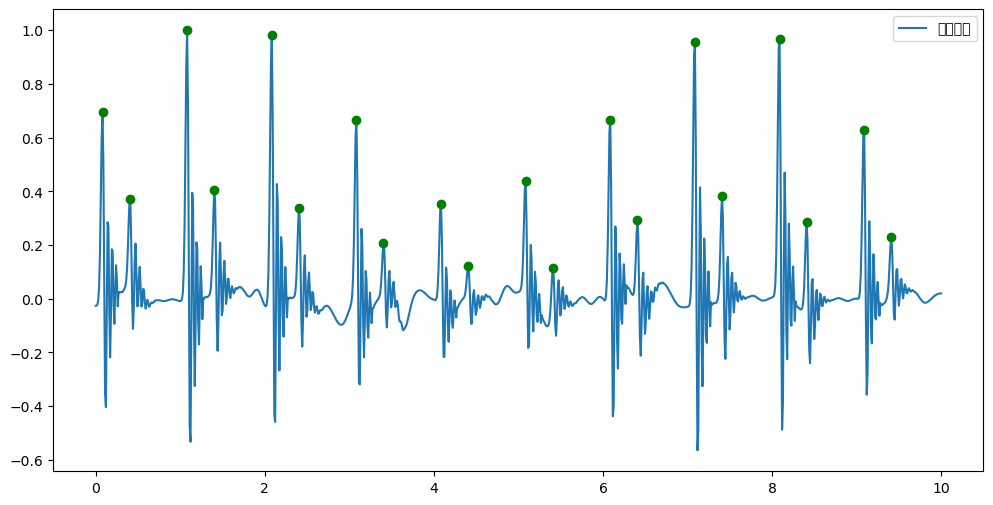

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema, find_peaks
from scipy.interpolate import interp1d

# 假设您的信号A如下：
fs = 100
t = np.linspace(0, 10, 10 * fs)
signal = data_tmp

# 峰值检测
peak_indices, _ = find_peaks(signal)  # 返回极大值点的索引

# 线性插值
t_peaks = t[peak_indices]  # 极大值点的时间
peak_values = signal[peak_indices]  # 极大值点的幅值
interpolation_func = interp1d(t_peaks, peak_values, kind='linear', bounds_error=False, fill_value=0)
envelope = interpolation_func(t)

peaks2,_ = find_peaks(envelope, distance = 10)

peaks2 = update_array(peaks2, data_tmp)
if len(peaks2)%2 != 0:
    peaks2 = np.delete(peaks2, len(peaks2) - 1)

diff_12 = peaks2[1::2] - peaks2[0::2]
diff_21 = peaks2[2::2] - peaks2[1:-1:2]
diff_22 = peaks2[2::2] - peaks2[:-2:2]

diff_12 = delete_unique(diff_12)
diff_21 = delete_unique(diff_21)
diff_22 = delete_unique(diff_22)

m_21 = np.mean(diff_21)
m_12 = np.mean(diff_12)
m_22 = np.mean(diff_22)

mag_0 = get_mag_0(peaks2, data_tmp_raw)
mag_1 = get_mag_1(peaks2, data_tmp_raw)

print(diff_12)
print(m_12, m_21)
# print(m_21)
# print(m_22)

# print(data_train[1, 1004])
print(data_test[1, 1004] / m_12)

# print(mag_0)
# print(mag_1)
# print(mag_0 - mag_1)

# 绘图
plt.figure(figsize=(12, 6))
plt.plot(t, signal, label='原始信号')
# plt.plot(t, envelope, label='包络', linewidth=2)
# plt.scatter(t_peaks, peak_values, color='red', label='峰值')
plt.plot(t[peaks2], data_tmp[peaks2], 'o', color = 'green')
plt.legend()
plt.show()


Text(0.5, 1.0, 'train')

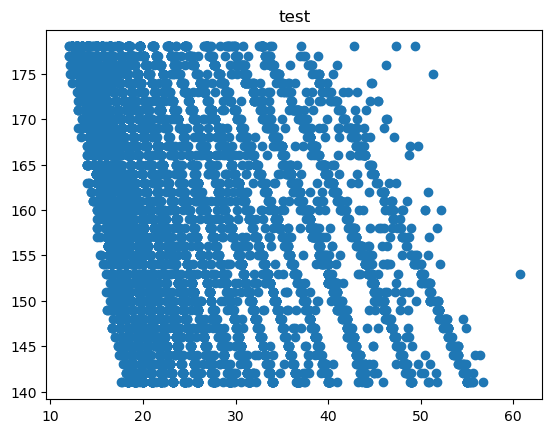

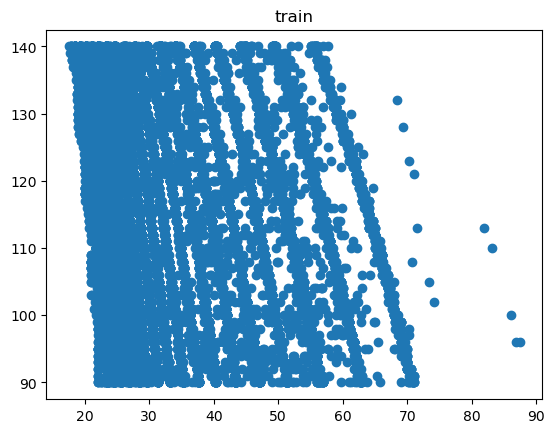

In [16]:
feature = 0
# m_train = np.load("./features_train.npy")[:, 0]/np.load("./features_train.npy")[:, 1]
# m_test = np.load("./features_test.npy")[:, 0]/np.load("./features_test.npy")[:, 1]

# m_train = np.load("./features_train.npy")[:, 1]*np.load("./features_train.npy")[:, 0]
# m_test = np.load("./features_test.npy")[:, 1]*np.load("./features_test.npy")[:, 0]

m_train = np.load("./features_train.npy")[:, feature]
m_test = np.load("./features_test.npy")[:, feature]
s_test = np.load("./data_test.npy")[:, 1004]
s_train = np.load("./data_train.npy")[:, 1004]

plt.figure()
plt.scatter(m_test, s_test)
plt.title("test")

plt.figure()
plt.scatter(m_train, s_train)
plt.title("train")

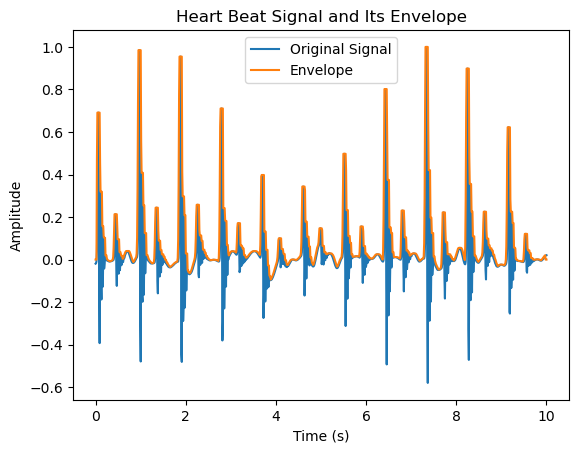

In [74]:
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(0, 10, 1000)
heart_beat = data_tmp
# 求取包络（使用简单移动平均法）
window_size = 6
half_window = int(window_size/2)
envelope = np.zeros_like(heart_beat)

for i in range(half_window, len(heart_beat)-half_window):
    envelope[i] = np.max(heart_beat[i-half_window:i+half_window])

# 绘制原始信号和包络
plt.plot(t, heart_beat, label="Original Signal")
plt.plot(t, envelope, label="Envelope")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Heart Beat Signal and Its Envelope")
plt.legend()
plt.show()

Peaks locations: 22
Peaks locations: [0.06 0.44 0.97 1.35 1.88 2.26 2.79 3.17 3.7  4.08 4.6  4.98 5.51 5.89
 6.42 6.8  7.33 7.71 8.24 8.62 9.15 9.53]


<function matplotlib.pyplot.show(close=None, block=None)>

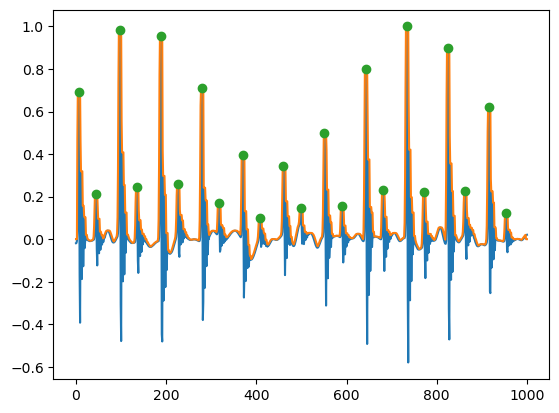

In [81]:
# 使用find_peaks函数识别波峰
peaks, _ = find_peaks(envelope, distance = 12, height = 0.07)

# 输出波峰的位置和幅度
print("Peaks locations:", len(peaks))
print("Peaks locations:", peaks/100)

plt.plot(t*100, heart_beat, label="Original Signal")
plt.plot(t*100, envelope, label="Envelope")
plt.plot(peaks, envelope[peaks], 'o')
plt.show
# print("Peaks amplitudes:", envelope[peaks])

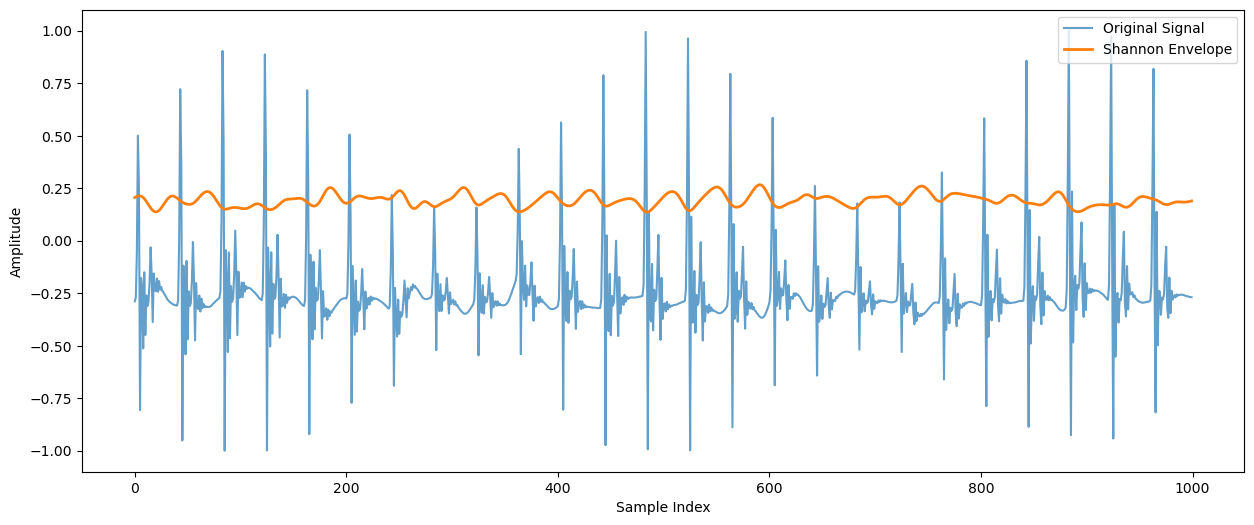

In [60]:

# 假设 A 是一个一维 numpy 数组，代表心音信号
A = data_tmp  # 以随机数生成一个示例信号

# 计算香农能量谱密度 (SESD)
SESD = -A**2 * np.log(A**2 + np.finfo(float).eps)

# 对 SESD 信号进行低通滤波处理
from scipy.signal import butter, filtfilt

def lowpass_filter(signal, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, signal)
    return y

fs = 100  # 假设采样频率为1000Hz
cutoff = 5  # 设定截止频率，根据实际信号调整
shannon_envelope = lowpass_filter(SESD, cutoff, fs)

# 绘制原始信号和香农包络波形
plt.figure(figsize=(15, 6))
plt.plot(A, label='Original Signal', alpha=0.7)
plt.plot(shannon_envelope, label='Shannon Envelope', linewidth=2)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


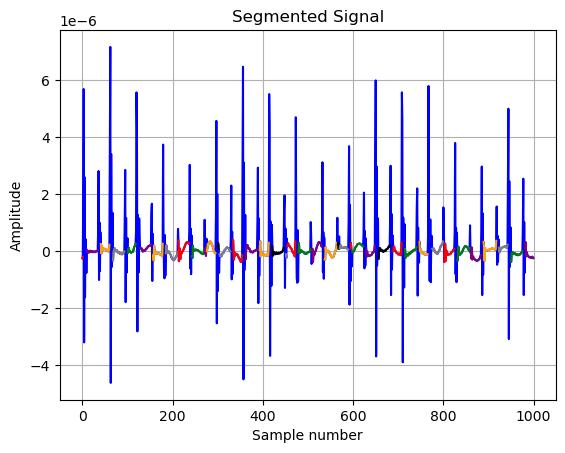

In [17]:
def segment_signal(data, threshold):
    """将时域信号分段的函数"""
    segments = []
    current_segment = []
    for i in range(len(data)):
        if abs(data[i]) < threshold:
            # 如果当前信号小于阈值，将其加入当前分段
            current_segment.append(data[i])
        else:
            # 如果当前信号大于等于阈值，当前分段结束，并加入分段列表
            if current_segment:
                segments.append(current_segment)
                current_segment = []
    # 将最后一个分段加入分段列表
    if current_segment:
        segments.append(current_segment)
    return segments

# 定义测试数据
data = data_tmp

# 分段阈值
threshold = 0.4*1e-6

# 将数据分段
segments = segment_signal(data, threshold)

# 绘制原始信号
plt.plot(data, color='blue')

# 绘制每个分段
colors = ['red', 'green', 'purple', 'orange', 'black', 'gray']
for i in range(len(segments)):
    plt.plot(np.arange(len(segments[i])) + np.argmax(data == segments[i][0]), segments[i], color=colors[i % len(colors)])

plt.xlabel('Sample number')
plt.ylabel('Amplitude')
plt.title('Segmented Signal')
plt.grid(True)
plt.show()

In [24]:
# 创建简单的时域信号
x = np.linspace(0, 10, 1000)
y = data_tmp

# 使用find_peaks函数识别波峰
peaks, _ = find_peaks(y, threshold=0.5*1e-6, distance=20)

# 输出波峰的位置和幅度
print("Peaks locations:", len(peaks))
print("Peaks amplitudes:", y[peaks])

Peaks locations: 32
Peaks amplitudes: [5.69511880e-06 2.81623060e-06 7.17233291e-06 2.85382127e-06
 5.57723248e-06 6.10935743e-07 3.74330277e-06 3.03224757e-06
 1.10321074e-06 4.57517468e-06 2.30561867e-06 6.47591558e-06
 2.93343950e-06 5.51643940e-06 1.96086256e-06 4.70353169e-06
 3.12241155e-06 1.17269251e-06 3.68709032e-06 2.05736783e-06
 5.99819155e-06 3.00015449e-06 5.57602889e-06 2.20750497e-06
 5.80070753e-06 1.53783803e-06 3.80064386e-06 9.09284135e-07
 2.97158598e-06 1.56905654e-06 5.00275583e-06 2.54649330e-06]


In [31]:
from wfdb.processing import gqrs_detect
# 构建Record对象
record_A = wfdb.Record(signals=data_tmp, sig_len=len(data_tmp), fs=100)

# QRS检测
qrs_positions, _ = wfdb.processing.gqrs_detect(record_A.p_signals[:, 0], record_A.fs)

# 计算每个心拍之间的间隔
intervals = np.diff(qrs_positions)

# 计算平均间隔
mean_rr_interval = np.mean(intervals)

# 获取心音波形
s1_waveforms, s2_waveforms = wfdb.processing.extract_heart_beats(record_A.p_signals[:, 0], qrs_positions, record_A.fs)

# 计算第一心音和第二心音的平均幅度
mean_s1_amplitude = np.mean(s1_waveforms.max(axis=1) - s1_waveforms.min(axis=1))
mean_s2_amplitude = np.mean(s2_waveforms.max(axis=1) - s2_waveforms.min(axis=1))

TypeError: Record.__init__() got an unexpected keyword argument 'signals'

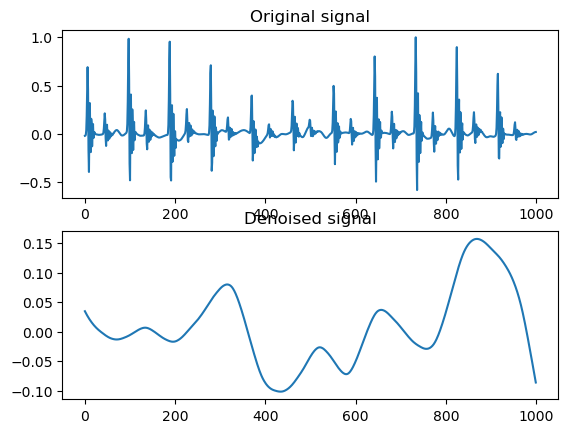

In [94]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# 生成一个示例信号
t = np.linspace(0, 10, 1000, endpoint=False)
noisy_Ssignal = data_tmp

# 设置小波去噪参数
wavelet = pywt.Wavelet('sym8')  # 使用 'sym8' 小波基
level = 6  # 增加分解级别
threshold = 2  # 调整阈值

# 进行小波去噪
coeffs = pywt.wavedec(noisy_signal, wavelet, level=level)
coeffs[1:] = (pywt.threshold(i, value=threshold, mode='soft') for i in coeffs[1:])
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# 绘制信号和去噪后的结果
plt.subplot(211)
plt.plot(signal)
plt.title("Original signal")
plt.subplot(212)
plt.plot(reconstructed_signal)
plt.title("Denoised signal")
plt.show()


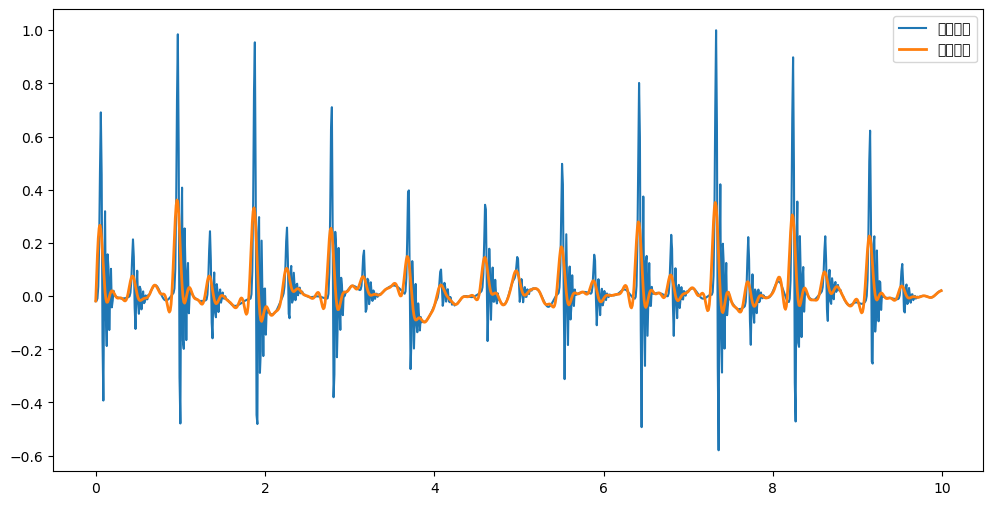

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# 创建模拟信号
fs = 100  # 采样频率
t = np.arange(0, 10, 1/fs)  # 时间向量
freq1 = 5  # 波峰频率
freq2 = 60  # 高频噪声
signal = data_tmp

# 定义低通滤波器
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# 应用低通滤波器
def butter_lowpass_filtfilt(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# 滤波处理
cutoff = 8  # 设定截止频率为10Hz
smoothed_signal = butter_lowpass_filtfilt(signal, cutoff, fs)

# 绘制原始信号与平滑信号
plt.figure(figsize=(12, 6))
plt.plot(t, signal, label='原始信号')
plt.plot(t, smoothed_signal, label='平滑信号', linewidth=2)
plt.legend()
plt.show()


/Users/darcy/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21253 (\N{CJK UNIFIED IDEOGRAPH-5305}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/darcy/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32476 (\N{CJK UNIFIED IDEOGRAPH-7EDC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


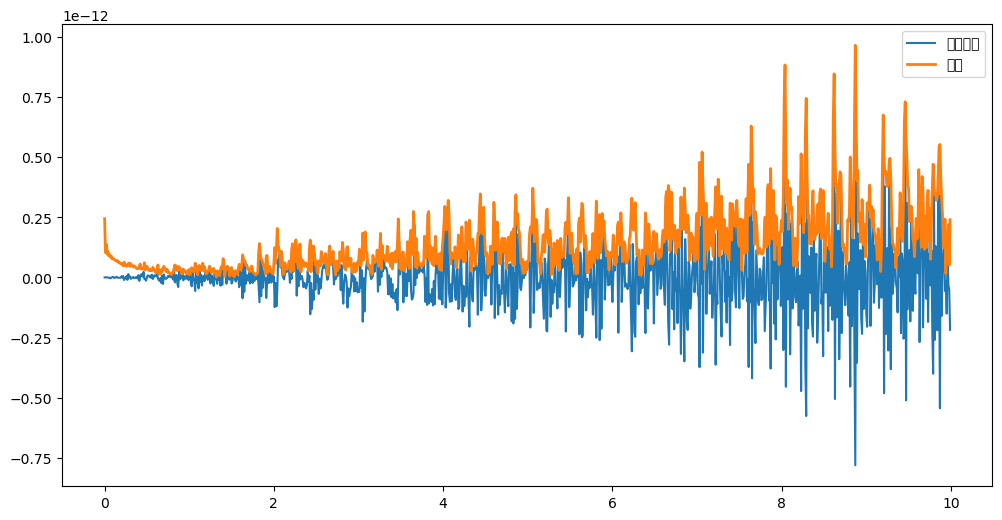

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# 创建模拟信号
fs = 100
t = np.arange(0, 10, 1/fs)
modulating_freq = 5
carrier_freq = 50
modulating_signal = (1.0 + 0.5 * np.sin(2 * np.pi * modulating_freq * t))
signal = modulating_signal * np.sin(2 * np.pi * carrier_freq * t)

# 使用希尔伯特变换求包络
analytic_signal = hilbert(signal)
envelope = np.abs(analytic_signal)

# 绘图
plt.figure(figsize=(12, 6))
plt.plot(t, signal, label='原始信号')
plt.plot(t, envelope, label='包络', linewidth=2)
plt.legend()
plt.show()


In [181]:
import numpy as np

# 创建一个示例二维数组
two_dim_array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# 创建一个示例一维数组
one_dim_array = np.array([10, 11, 12])

# 使用numpy.vstack()将一维数组加在二维数组的最后一行
result_array = np.vstack((two_dim_array, one_dim_array))

print(result_array)


[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
